# Refined attractor invariants of quivers with potentials
$\def\bb{\mathbb}\def\Om{\Omega}$
See the notebook "Wall-crossing.ipynb" and [arXiv:2012.14358](https://arxiv.org/abs/2012.14358) for more details. For any stability parameter $z$, we have invariants (stacky, rational, integer DT) $A_{z}(d)$, $\bar\Om_{z}(d)$, $\Om_{z}(d)$ related by
$$1+\sum_{z(d)\in\ell}A_z(d)x^d=\exp\rbr{\frac{\sum_{z(d)\in\ell}\bar\Om_z(d)x^d}{y^{-1}-y}}
=\Exp\rbr{\frac{\sum_{z(d)\in\ell}\Om_z(d)x^d}{y^{-1}-y}}.$$

Let $\chi$ be the Euler form of the quiver and let $\ang{-,-}$ be the corresponding skew-symmetric form.
For any $d\in\bb N^r$, consider $z_d=\ang{-,d}:\bb Z^r\to\bb C$ and let $z$ be its generic perturbation. The corresponding invairants $A_{z}(d)$, $\bar\Om_{z}(d)$, $\Om_{z}(d)$ are called attractor invariants and are denoted $A_{*}(d)$, $\bar\Om_{*}(d)$, $\Om_{*}(d)$ respectively. They usually have a particularly simple form and they uniquely determine all other invariants.
For example, one knows that for an acyclic quiver $\Om_*(d)=1$ if $d=e_i$ and is zero otherwise [arXiv:2012.14358](https://arxiv.org/abs/2012.14358).

For a quiver $Q$ without relations, we have a simple formula (for the trivial stability paramter)
$$A_{total}(d)=(-y)^{\chi(d,d)}\frac{[R(Q,d)]}{[GL_d]},$$
where $R(Q,d)$ is the vector space of $d$-dimensional $Q$-representations.
This formula can be used to compute all other invariants using wall-crossing formulas.

For a quiver $Q$ equipped with a potential the problem is more complicated and the total invariants (as well as all other invariants) can be computed only in some particular examples. Here we consider some of them.

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from sage.graphs.graph_plot import DEFAULT_PLOT_OPTIONS as DPO
DPO['layout'] = 'circular'
DPO['loop_size']=.3
from msinvar.quivers import *
from msinvar.wall_crossing import *

## Quivers without potentials
We consider first attractor invariants of some quivers without potentials.

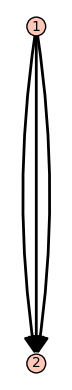

{(1, 0): 1, (0, 1): 1}

In [2]:
Q=KroneckerQuiver(3); show(Q)
W=Q.wcs([3,3])
W.intAtt().dict() #this is an acyclic quiver, so the result is trivial

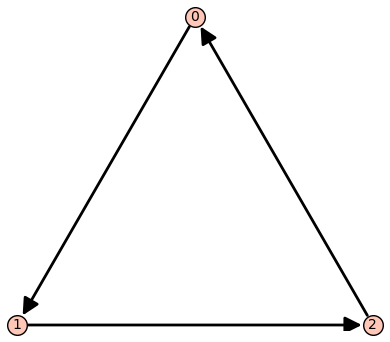

{(1, 0, 0): 1, (0, 1, 0): 1, (0, 0, 1): 1, (1, 1, 1): -y}

In [3]:
r=3
CQ=CyclicQuiver(r); show(CQ)
W=CQ.wcs([3]*r)
W.intAtt().dict() # invariants for a cyclic quiver without potential

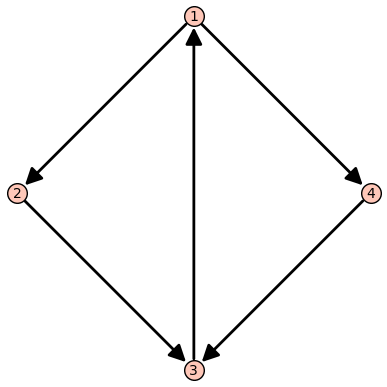

{(1, 0, 0, 0): 1,
 (0, 1, 0, 0): 1,
 (0, 0, 1, 0): 1,
 (1, 1, 1, 0): -y,
 (0, 0, 0, 1): 1,
 (1, 0, 1, 1): -y,
 (1, 1, 1, 1): y^2,
 (2, 1, 2, 1): -y^3,
 (2, 2, 2, 1): y^4,
 (2, 1, 2, 2): y^4,
 (2, 2, 2, 2): -y^5}

In [4]:
Q=Quiver('1-2-3-1,1-4-3'); show(Q)
W=Q.wcs([2]*4)
W.intAtt().dict()

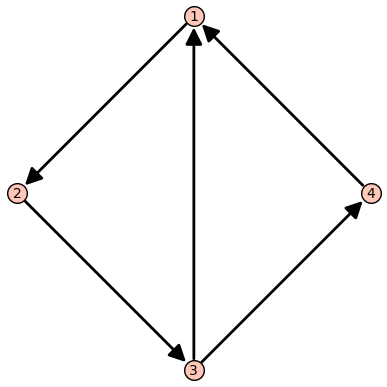

{(1, 0, 0, 0): 1,
 (0, 1, 0, 0): 1,
 (0, 0, 1, 0): 1,
 (1, 1, 1, 0): -y,
 (0, 0, 0, 1): 1,
 (1, 1, 1, 1): y^2,
 (2, 2, 2, 1): y^4,
 (2, 2, 2, 2): -y^5}

In [5]:
Q=Quiver('1-2-3-4-1,3-1'); show(Q)
W=Q.wcs([2]*4)
W.intAtt().dict()

## Cyclic quiver with cyclic potential

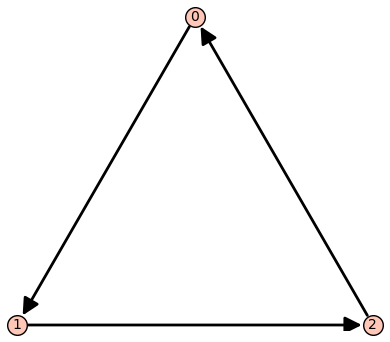

{(1, 0, 0): 1, (0, 1, 0): 1, (0, 0, 1): 1}

In [6]:
from msinvar.potential_quiver_invar import *
r=3
CQ = CyclicQuiver(r); show(CQ)
W=CQ.wcs([3]*r)
W.total=cyclic_potential_total(W) # Total invariant for a cyclic quiver with potential
W.intAtt().dict() # Attractor invariant for a cyclic quiver with potential

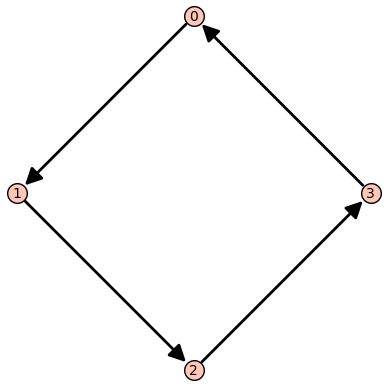

{(1, 0, 0, 0): 1, (0, 1, 0, 0): 1, (0, 0, 1, 0): 1, (0, 0, 0, 1): 1}

In [7]:
r=4
CQ = CyclicQuiver(r); show(CQ)
W=CQ.wcs([2]*r)
W.total=cyclic_potential_total(W) # Total invariant for a cyclic quiver with potential
W.intAtt().dict() # Attractor invariant for a cyclic quiver with potential 

## Quivers with potentials arising from McKay quivers
We consider McKay quivers arising from the action of $\bb Z_r$ on $\bb C^3$ given by $(1,k,-k-1)$. The quiver has vertices $i\in\bb Z_r$ and vertices $a_i:i\to i+1$, $b_i\to i+k$, $c_i:i\to i-k-1$. Potential is a linear combination of various $3$-cycles. We implement such quiver with potentials using translation quivers [arXiv:1911.01788](https://arxiv.org/abs/1911.01788). 
The total stacky invariants are computed using the double dimensional reduction [arXiv:2012.14358](https://arxiv.org/abs/2012.14358). Here we compute just the nilpotent part.

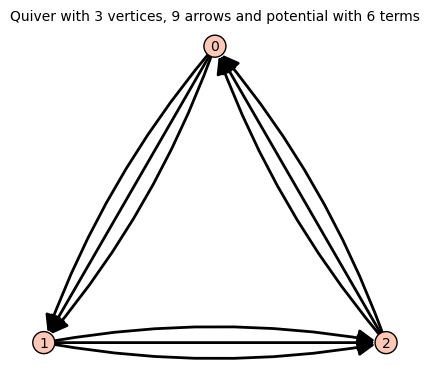

In [8]:
r, k =3, 1
CQ = CyclicQuiver(r)
Q = CQ.translation_PQ(k); Q # translation quiver with potential, see arXiv:1911.01788
# this is the McKay quiver of C3/Z3

In [9]:
W = Q.wcs([3]*r)
W.total=cyclic_TPQ_total(W, k) # we compute total invariants using dimensional reduction, arXiv:2012.14358
W.intAtt().simp().dict() # Attractor invar for the translation quiver with potential

{(1, 0, 0): 1,
 (0, 1, 0): 1,
 (0, 0, 1): 1,
 (1, 1, 1): (-2*y^2 - 1)/y,
 (2, 2, 2): (-2*y^2 - 1)/y,
 (3, 3, 3): (-2*y^2 - 1)/y}

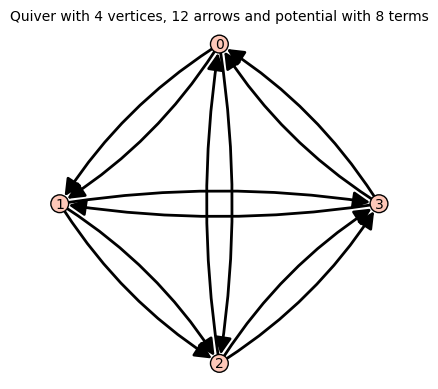

In [21]:
r, k =4, 1
CQ = CyclicQuiver(r)
Q = CQ.translation_PQ(k); Q # translation quiver with potential, see arXiv:1911.01788
# this is the McKay quiver of C3/Z4 for the action (1,1,2)

In [29]:
W = Q.wcs([2]*r)
W.total=cyclic_TPQ_total(W, k) # we compute total invariants using dimensional reduction, arXiv:2012.14358
%time W.intAtt().simp().dict() # Attractor invar for the translation quiver with potential

CPU times: user 767 ms, sys: 874 µs, total: 768 ms
Wall time: 768 ms


{(1, 0, 0, 0): 1,
 (0, 1, 0, 0): 1,
 (0, 0, 1, 0): 1,
 (1, 0, 1, 0): -y,
 (0, 0, 0, 1): 1,
 (0, 1, 0, 1): -y,
 (1, 1, 1, 1): (-3*y^2 - 1)/y,
 (2, 1, 2, 1): -y,
 (1, 2, 1, 2): -y,
 (2, 2, 2, 2): (-3*y^2 - 1)/y}

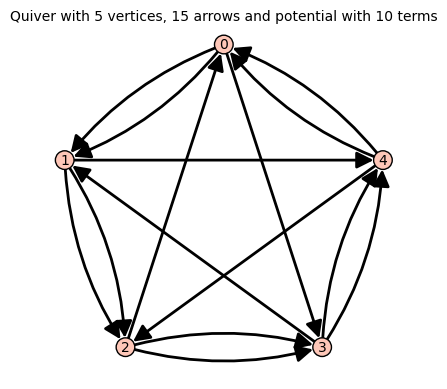

In [30]:
r, k =5, 1
CQ = CyclicQuiver(r)
Q = CQ.translation_PQ(k); Q # translation quiver with potential, see arXiv:1911.01788
# this is the McKay quiver of C3/Z5 for the action (1,1,3)

In [31]:
W = Q.wcs([2]*r)
W.total=cyclic_TPQ_total(W, k) # we compute total invariants using dimensional reduction, arXiv:2012.14358
%time W.intAtt().simp().dict() # Attractor invar for the translation quiver with potential

CPU times: user 5.87 s, sys: 7.75 ms, total: 5.88 s
Wall time: 5.88 s


{(1, 0, 0, 0, 0): 1,
 (0, 1, 0, 0, 0): 1,
 (0, 0, 1, 0, 0): 1,
 (0, 0, 0, 1, 0): 1,
 (0, 0, 0, 0, 1): 1,
 (1, 1, 1, 1, 1): (-3*y^2 - 2)/y,
 (2, 2, 2, 2, 2): (-3*y^2 - 2)/y}

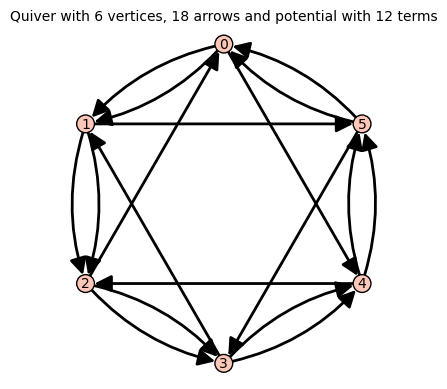

In [32]:
r, k =6, 1
CQ = CyclicQuiver(r)
Q = CQ.translation_PQ(k); Q #translation quiver with potential, see arXiv:1911.01788
# this is the McKay quiver of C3/Z6 for the action (1,1,4)

In [33]:
W = Q.wcs([2]*r)
W.total=cyclic_TPQ_total(W, k) # we compute total invariants using dimensional reduction, arXiv:2012.14358
%time W.intAtt().simp().dict() # Attractor invar for the translation quiver with potential

CPU times: user 1min, sys: 90.1 ms, total: 1min 1s
Wall time: 1min 1s


{(1, 0, 0, 0, 0, 0): 1,
 (0, 1, 0, 0, 0, 0): 1,
 (0, 0, 1, 0, 0, 0): 1,
 (0, 0, 0, 1, 0, 0): 1,
 (0, 0, 0, 0, 1, 0): 1,
 (1, 0, 1, 0, 1, 0): -y,
 (0, 0, 0, 0, 0, 1): 1,
 (0, 1, 0, 1, 0, 1): -y,
 (1, 1, 1, 1, 1, 1): (-4*y^2 - 2)/y,
 (2, 1, 2, 1, 2, 1): -y,
 (1, 2, 1, 2, 1, 2): -y,
 (2, 2, 2, 2, 2, 2): (-4*y^2 - 2)/y}

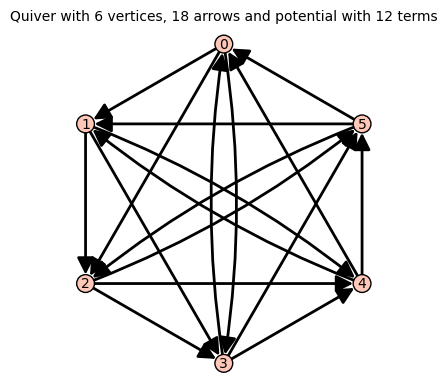

In [34]:
r, k =6, 2
CQ = CyclicQuiver(r)
Q = CQ.translation_PQ(k); Q # translation quiver with potential, see arXiv:1911.01788
# this is the McKay quiver of C3/Z6 for the action (1,2,3)

In [35]:
W = Q.wcs([2]*r)
W.total=cyclic_TPQ_total(W, k) # we compute total invariants using dimensional reduction, arXiv:2012.14358
%time W.intAtt().simp().dict() # Attractor invar for the translation quiver with potential

CPU times: user 1min 46s, sys: 181 ms, total: 1min 46s
Wall time: 1min 46s


{(1, 0, 0, 0, 0, 0): 1,
 (0, 1, 0, 0, 0, 0): 1,
 (0, 0, 1, 0, 0, 0): 1,
 (0, 0, 0, 1, 0, 0): 1,
 (1, 0, 0, 1, 0, 0): -y,
 (0, 0, 0, 0, 1, 0): 1,
 (0, 1, 0, 0, 1, 0): -y,
 (1, 0, 1, 0, 1, 0): -y,
 (1, 1, 0, 1, 1, 0): -y,
 (0, 0, 0, 0, 0, 1): 1,
 (0, 0, 1, 0, 0, 1): -y,
 (0, 1, 0, 1, 0, 1): -y,
 (1, 0, 1, 1, 0, 1): -y,
 (0, 1, 1, 0, 1, 1): -y,
 (1, 1, 1, 1, 1, 1): (-5*y^2 - 1)/y,
 (2, 1, 1, 2, 1, 1): -y,
 (1, 2, 1, 1, 2, 1): -y,
 (2, 1, 2, 1, 2, 1): -y,
 (2, 2, 1, 2, 2, 1): -y,
 (1, 1, 2, 1, 1, 2): -y,
 (1, 2, 1, 2, 1, 2): -y,
 (2, 1, 2, 2, 1, 2): -y,
 (1, 2, 2, 1, 2, 2): -y,
 (2, 2, 2, 2, 2, 2): (-5*y^2 - 1)/y}

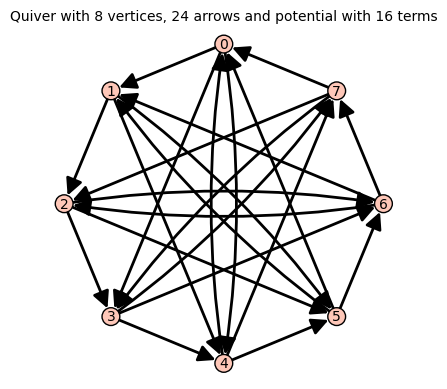

In [28]:
r,k=8,3
CQ = CyclicQuiver(r)
Q = CQ.translation_PQ(k); Q

In [29]:
W = Q.wcs([1]*r)
W.total=cyclic_TPQ_total(W, k) # we compute total invariants using dimensional reduction, arXiv:2012.14358
%time W.intAtt().simp().dict()

CPU times: user 3.84 s, sys: 6 ms, total: 3.84 s
Wall time: 3.84 s


{(1, 0, 0, 0, 0, 0, 0, 0): 1,
 (0, 1, 0, 0, 0, 0, 0, 0): 1,
 (0, 0, 1, 0, 0, 0, 0, 0): 1,
 (0, 0, 0, 1, 0, 0, 0, 0): 1,
 (0, 0, 0, 0, 1, 0, 0, 0): 1,
 (1, 0, 0, 0, 1, 0, 0, 0): -y,
 (0, 0, 0, 0, 0, 1, 0, 0): 1,
 (0, 1, 0, 0, 0, 1, 0, 0): -y,
 (1, 1, 0, 0, 1, 1, 0, 0): -y,
 (0, 0, 0, 0, 0, 0, 1, 0): 1,
 (0, 0, 1, 0, 0, 0, 1, 0): -y,
 (0, 1, 1, 0, 0, 1, 1, 0): -y,
 (1, 1, 1, 0, 1, 1, 1, 0): -y,
 (0, 0, 0, 0, 0, 0, 0, 1): 1,
 (0, 0, 0, 1, 0, 0, 0, 1): -y,
 (1, 0, 0, 1, 1, 0, 0, 1): -y,
 (1, 1, 0, 1, 1, 1, 0, 1): -y,
 (0, 0, 1, 1, 0, 0, 1, 1): -y,
 (1, 0, 1, 1, 1, 0, 1, 1): -y,
 (0, 1, 1, 1, 0, 1, 1, 1): -y,
 (1, 1, 1, 1, 1, 1, 1, 1): (-6*y^2 - 2)/y}